# Final Project: Part 2
- Create an exploratory data analysis notebook.
- Perform statistical analysis, along with any visualizations.
- Determine how to handle sampling or missing values.
- Clearly identify shortcomings, assumptions, and next steps.


## EDA To Consider

### 

In [14]:
#Import stats/EDA libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import DescrStatsW
from pathlib import Path

#Import viz libraries
import pandas as pd
import seaborn as sns


In [71]:
#List of the variables from the DHS file that I want to load
dhs_variables = ["v005","v012","v023","v024","v025", "v106", "v107", "v130", "v119", "v120", "v121", 
                 "v153", "v113", "v115", "v123", "v124", "v125", "v190", "v137", "v201", "h44a_1", "h46a_1", "m15_1", "m73_1"]

In [99]:
#load the data from the namibia DHS dataset
data = Path('Datasets','NMIR61FL.DTA')
nmb_dhs = pd.read_stata(data, columns = dhs_variables,convert_categoricals = False)

#create a dataset that focuses on only the values of women ages 15-49. the survey notes suggest that there were 842 women who were added (over the ages of 50) in half of the households survyed. 
nmb_dhs = nmb_dhs.loc[nmb_dhs.loc[:,"v012"]<50,:]

In [73]:
#create a survey weight variable. For DHS, you have to take the survey weight variable and divide it by 1,000,000
#svy_weight = nmb_dhs.loc[:,"v005"]/1000000

#create a weighted dataframe using the weightstats module
#nmb_dhs_weighted = DescrStatsW(nmb_dhs.h44a_1, weights=svy_weight)

In [100]:
#Cross tab of care seeking and education
h46_v106 = pd.crosstab(nmb_dhs.loc[:,"h46a_1"],nmb_dhs.loc[:,'v106'],normalize = True,margins = True).round(3)
h46_v106

v106,0,1,2,3,All
h46a_1,,,,,
11.0,0.008,0.044,0.155,0.015,0.221
12.0,0.002,0.012,0.031,0.003,0.049
13.0,0.024,0.145,0.342,0.010,0.521
14.0,0.001,0.001,0.002,0.000,0.004
15.0,0.000,0.001,0.000,0.000,0.001
21.0,0.000,0.002,0.024,0.019,0.045
22.0,0.000,0.001,0.010,0.001,0.012
23.0,0.001,0.009,0.049,0.006,0.065
24.0,0.000,0.001,0.034,0.020,0.055


In [101]:
nmb_dhs.loc[:,"h44a_1"].value_counts(normalize = True)

13.0    0.583162
11.0    0.262834
12.0    0.057495
23.0    0.024641
24.0    0.022587
21.0    0.016427
96.0    0.010267
32.0    0.008214
14.0    0.006160
22.0    0.004107
33.0    0.004107
Name: h44a_1, dtype: float64

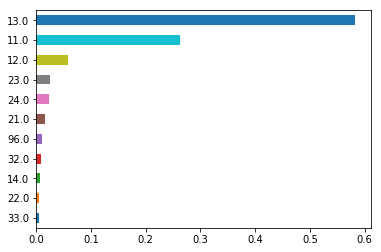

In [102]:
ax = nmb_dhs.loc[:,"h44a_1"].value_counts(normalize = True, ascending = True).plot(kind="barh")

### Missing Variables
- How many missing values do I have for each of my variables?
    - If it is a lot, I may need to reconsider each of the variables, I'm going to use. Or decide to impute the values. 
- Make sure to report what I've done with my missing values

In [103]:
#number of missing values
nmb_dhs.isnull().sum()

v005         0
v012         0
v023         0
v024         0
v025         0
v106         0
v107       554
v130        22
v119         0
v120         1
v121         2
v153         7
v113        11
v115        28
v123        11
v124        13
v125        10
v190         0
v137         0
v201         0
h44a_1    8689
h46a_1    8285
m15_1     5208
m73_1     7110
dtype: int64

In [77]:
#number of non-missing values
#number of missing values
nmb_dhs.notnull().sum()

v005      9176
v012      9176
v023      9176
v024      9176
v025      9176
v106      9176
v107      8622
v130      9154
v119      9176
v120      9175
v121      9174
v153      9169
v113      9165
v115      9148
v123      9165
v124      9163
v125      9166
v190      9176
v137      9176
v201      9176
h44a_1     487
h46a_1     891
m15_1     3968
m73_1     2066
dtype: int64

In [118]:
nmb_dhs_diarrhea = nmb_dhs.loc[nmb_dhs.loc[:,"h46a_1"].notnull(),:]

In [122]:
nmb_dhs_diarrhea.loc[:,"v190"].value_counts()

3    207
2    187
4    183
1    170
5    144
Name: v190, dtype: int64

In [126]:
#np.isnan(X2.any()) and np.isfinite(X2.all())
np.isfinite(nmb_dhs_diarrhea.all())

v005      True
v012      True
v023      True
v024      True
v025      True
v106      True
v107      True
v130      True
v119      True
v120      True
v121      True
v153      True
v113      True
v115      True
v123      True
v124      True
v125      True
v190      True
v137      True
v201      True
h44a_1    True
h46a_1    True
m15_1     True
m73_1     True
dtype: bool

In [119]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [187]:
feature_cols = ['v106','v190','v024','v137','v025','v012']
X = nmb_dhs_diarrhea.loc[:,feature_cols]
y = nmb_dhs_diarrhea.loc[:,'h46a_1']

In [192]:
# 1. Split X and y into training and testing sets (using `random_state` for reproducibility).
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)

In [189]:
# 2. Train the estimator on the training set (using K=1)
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=18, p=2,
           weights='uniform')

In [190]:
# 3. Test the estimator on the testing set and check the accuracy.
y_pred_class = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred_class)

0.47533632286995514

In [191]:
most_common_value = y.value_counts().idxmax()
null_pred = np.zeros(y.shape) + most_common_value
null_pred

array([13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13.,
       13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13.,
       13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13.,
       13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13.,
       13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13.,
       13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13.,
       13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13.,
       13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13.,
       13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13.,
       13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13.,
       13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13.,
       13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13.,
       13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13.,
       13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13., 13

In [165]:
# # then compare predicting the mean every time to the true values
# /scrub/
null_accuracy = metrics.accuracy_score(null_pred, y)
null_accuracy

0.5207631874298541

### Models to Consider

- SoftMax Model
- One minus the rest model